# Animation_html5_test

Michael Lamoureux, August 2016.

We try out something using html5 for animation, from this web page:
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In his blog post Embedding Matplotlib Animations in IPython Notebooks, Jake VanderPlas presents a slick hack for embedding Matplotlib Animations in IPython Notebooks, which involves writing it as a video to a tempfile, and then re-encoding it in Base64 as a HTML5 Video.

Unfortunately (or rather fortunately), this hack has been largely rendered obsolete by the heavy development efforts dedicated to both Matplotlib and IPython Notebook (since renamed to Jupyter Notebook) in recent years. In particular, Matplotlib 1.5.1 now supports inline display of animations in the notebook with the to_html5_video method, which converts the animation to an h264 encoded video and embeddeds it directly in the notebook.

In this notebook, we reproduce Jake VanderPlas' blog post with this new feature.


First step is to initialize some things in Python. 
- we need numpy for the math
- We need matplotlib for plotting
- we need %matplotlib inline   to get things to plot right on the notebook
- we need animation from matplotlib, and HTML from iPython.display to show the animations

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

We now have four steps to get an animated plot
1. set up the figure frame
2. define the initializing function
3. define the function that draws each frame of the animation
4. call the animator function, which creates all the frames and saves them for you

Then we are ready to call "HTML" to display the animation. 

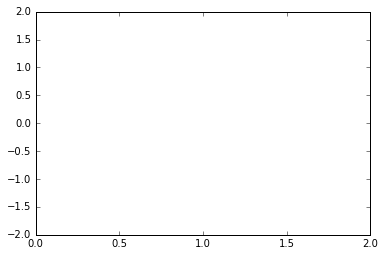

In [3]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [4]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [5]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [6]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [7]:
HTML(anim.to_html5_video())

In [8]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')